<a href="https://colab.research.google.com/github/Felipe-Oliveira11/Marketing-ML/blob/master/Marketing_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Marketing 
<hr>
<br>


##### Desafio

O desafio envolve analisar campanhas de marketing de uma institiução bancária. Nas campanhas é vendido ao cliente um produto adicional de débito automático. Queremos saber se um determinado cliente se inscreve ou não ao produto. Portanto, é um problema de classificação:

* 1. ou o cliente se inscreve
* 2. ou o cliente não se inscreve

<br>

<p align=center>
<img src=https://cendyn.com/wp-content/uploads/2019/04/AdobeStock_240428469.jpg" width="70%"></p>

https://i2.wp.com/aliz.ai/wp-content/uploads/2019/01/Machine-Learning-in-Digital-Marketing.png?fit=3042%2C1521&ssl=1





<br>

#### O Objetivo
É importante ressaltar que não se trata de uma competição de problemas de machine learning: não queremos o melhor escore do modelo e sim a sua melhor análise. Portanto, o objetivo deste desafio não é escovar os 3% de otimização na performance. E sim, a análise mais clara e objetiva que vai, consequentemente, permitir aos stakeholders entender melhor os dados e quais são os possíveis planos de ação e suas respectivas argumentações.



<br>

Portanto, em termos claros, os objetivos —e entregáveis— deste desafio podem ser divididos em duas categorias:

<b>Code:</b>

Implementar um modelo de classificação com uma performance aceitável

O aceitável é explicitamente arbitrário. Aceitável de modo que viabilize uma análise estatisticamente fundamentada
Conjunto de dados contendo a coluna da previsão, y'

<br>


<b>Insight:</b>

Elencar e analisar quais features são determinantes para aderência de um cliente ao produto
Descrever um plano de ação para futuras campanhas de marketing fundamentado na análise deste conjunto de dados

<b>Os critérios</b>
<br>

O que será avaliado pode ser dividido em duas categorias de capacidades

<b>Analíticas: de exploração de dados</b>

* 1. na exploração uni e multivariada dos dados
* 2. para correção e transformação de dados (quando for necessário)
* 3. para encontrar e responder às perguntas certas
* 4. para decidir quais visualizações devem ser feitas (e quais devem permanecer na análise)
* 5. para entender o comportamento estatístico das variáveis e seu peso na orientação das análises.



<b>Problemas: de aprendizado de máquina </b>

* 1. na definição de quais métricas vão ser usadas para avaliar a performance.
* 2. na apresentação e análise dos resultados obtidos
* 3. na avaliação do over-underfitting do(s) modelo(s) (e o que pode ser feito para minimizar estes efeitos)
* 4. no manuseio das features: avaliação de importância, da seleção e criação/transformação

In [1]:
!pip install yellowbrick
!pip install shap
!pip install pycaret 

     |████████████████████████████████| 276kB 2.8MB/s 
  Created wheel for shap: filename=shap-0.35.0-cp36-cp36m-linux_x86_64.whl size=394133 sha256=496474630c8cc7d7d882d39788378feb2eadd0c0ecb08f3d03cc54ef5b4cfc27
  Stored in directory: /root/.cache/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap
     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 1.2MB 8.8MB/s 
     |████████████████████████████████| 1.6MB 15.9MB/s 
     |████████████████████████████████| 389kB 26.7MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 102kB 7.5MB/s 
     |████████████████████████████████| 266kB 29.9MB/s 
     |████████████████████████████████| 3.2MB 30.2MB/s 
     |████████████████████████████████| 63.9MB 58kB/s 
     |████████████████████████████████| 133kB 42.6MB/s 
     |████████████████████████████████| 61kB 7.2MB/s 
     |████████████████████████████████| 7.0MB 1

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

import shap
shap.initjs()

from yellowbrick.classifier import ConfusionMatrix
from hyperopt import hp, tpe, fmin, Trials
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
path = '/content/drive/My Drive/Inteligência Artificial - Colab/Marketing /campaigns.csv'
marketing = pd.read_csv(path)
marketing.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40690 entries, 0 to 40689
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  40690 non-null  int64 
 1   age         40690 non-null  int64 
 2   job         40690 non-null  object
 3   marital     40690 non-null  object
 4   education   40690 non-null  object
 5   default     40690 non-null  object
 6   balance     40690 non-null  int64 
 7   housing     40690 non-null  object
 8   loan        40690 non-null  object
 9   contact     40690 non-null  object
 10  day         40690 non-null  int64 
 11  month       40690 non-null  object
 12  duration    40690 non-null  int64 
 13  campaign    40690 non-null  int64 
 14  pdays       40690 non-null  int64 
 15  previous    40690 non-null  int64 
 16  poutcome    40690 non-null  object
 17  y           40690 non-null  object
dtypes: int64(8), object(10)
memory usage: 5.6+ MB


### Dicionário de dados 

*  <b>Unnamed: 0</b>  Coluna não identificada, provavelmente seja o ID 
* <b>age</b>: Idade do cliente 
* <b>job</b>: Profissão do cliente 
* <b>marital</b>: Relacionamento conjugal
* <b>education</b>: Grau acadêmico 
* <b>default </b>: Padrão (não identificada) 
* <b> balance </b>: Saldo 
* <b> housing </b>: Moradia própia
* <b> loan  </b>: Solicitação de Empréstimo 
* <b> contact </b>: Contato do cliente 
* <b> day </b>: Dia 
* <b> month </b>: Mês 
* <b> duration </b>: Duração (Contato com o cliente) 
* <b> campaign </b>: Campanha (número da campanha a qual o cliente participou) 
* <b> pdays </b>: Não identificada 
* <b> previous </b>: Prévio (antes da campanha)  
* <b> poutcome </b>: Resultado da campanha anterior 
* <b> y </b>: Cliente se inscreveu ou não na campanha



<br>
<hr>

<br>

### 1. Análise Exploratória de dados 

O contexto do nosso problema é identificar, a adesão de um cliente a uma campamnha de marketing ou não, vou fazer uma análise sobre as features contidas neste dataset, para descrever melhor o comportamento das features e a relação do cliente e o seu comportamento, diante de uma campanha de marketing. 

<br>
<hr>


##### Houve um número maior de clientes que se inscreveram ? 

Inscritos: 4787  | Não inscritos: 35903






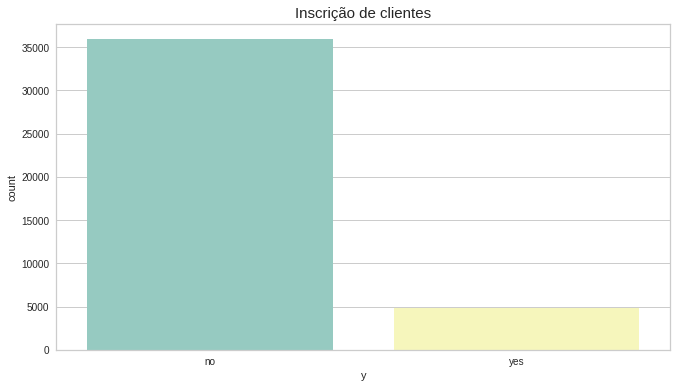

In [75]:
# Clientes inscritos
inscritos = len(marketing[marketing['y']=='yes'])
nao_inscritos = len(marketing[marketing['y']=='no'])


print('Inscritos: {}  | Não inscritos: {}'.format(inscritos, nao_inscritos))
print('\n')

plt.figure(figsize=(11,6))
plt.title('Inscrição de clientes', fontsize=15)
sns.countplot(marketing['y'], palette='Set3')
print('\n')

A base contém <b> 40.690 </b> clientes, apenas <b> 4.787 </b> se inscreveram na campanha de marketing proposta, há uma diferença bruta nos números, e identificamos que vamos ter que ponderar um desbalancemaneto bruto de classes na parte posterior da modelagem. 

<br>
<hr>
<br>





##### Qual a idade média dos clientes inscritos e não inscritos ? 

Idade média inscritos: 42
Idade média não inscritos: 41




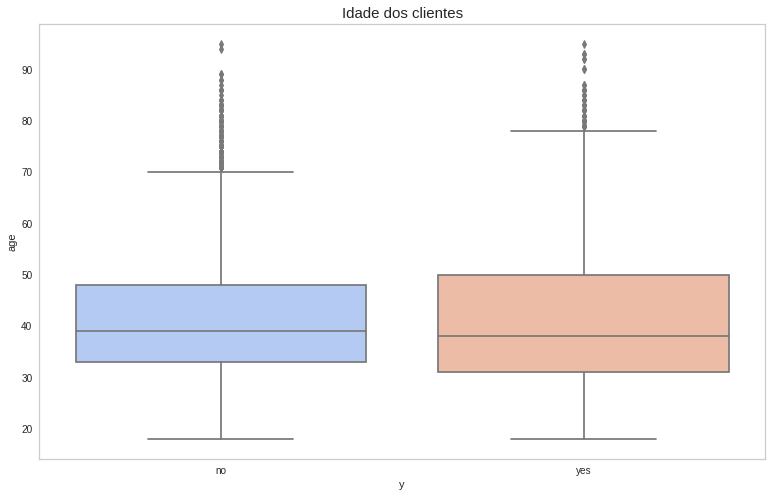

In [6]:
plt.figure(figsize=(13,8))
plt.grid(False)
plt.title('Idade dos clientes', fontsize=15)
sns.boxplot(x='y', y='age', data=marketing, palette='coolwarm')

# Idade média 
media_inscritos = round(np.mean(marketing[marketing['y']=='yes']['age']))
media_nao_inscritos = round(np.mean(marketing[marketing['y']=='no']['age']))

print('Idade média inscritos: {}'.format(media_inscritos))
print('Idade média não inscritos: {}'.format(media_nao_inscritos))
print('\n')

Olhando para o gráfico de boxplot, onde comparamos a idade do cliente com sua decisão de inscrição ou não, cliente acima dos 70 anos possuem uma grande adesão ao produto adicional, clientes entre 20 a 30 anos tem uma maior adesão também pelo produto, vamos continuar investigando essas hipóteses.  

In [7]:
# Inscritos acima dos 70 anos 
len(marketing[(marketing['y']=='yes') & (marketing['age']>=70)])

214

In [8]:
# Não Inscritos acima dos 70 anos 
len(marketing[(marketing['y']=='no') & (marketing['age']>=70)])

282

<br>
<hr>


##### A Profissão tem impacto nas inscrições ? 

In [9]:
print('Profissões dos clientes')
print('\n')
marketing['job'].value_counts()

Profissões dos clientes




blue-collar      8769
management       8504
technician       6818
admin.           4661
services         3725
retired          2027
self-employed    1427
entrepreneur     1339
unemployed       1193
housemaid        1125
student           848
unknown           254
Name: job, dtype: int64


Entendimento de algumas profissões

* <b> blue-collar: </b> Um trabalhador de colarinho azul é um membro da classe trabalhadora que normalmente realiza trabalho manual.

* <b> retired: </b> Aposentados
* <b> self-employed: </b> Trabalhados Autonomos
* <b> unemployed: </b> Desimpregados 
* <b> housemaid: </b> Empregados caseiros 





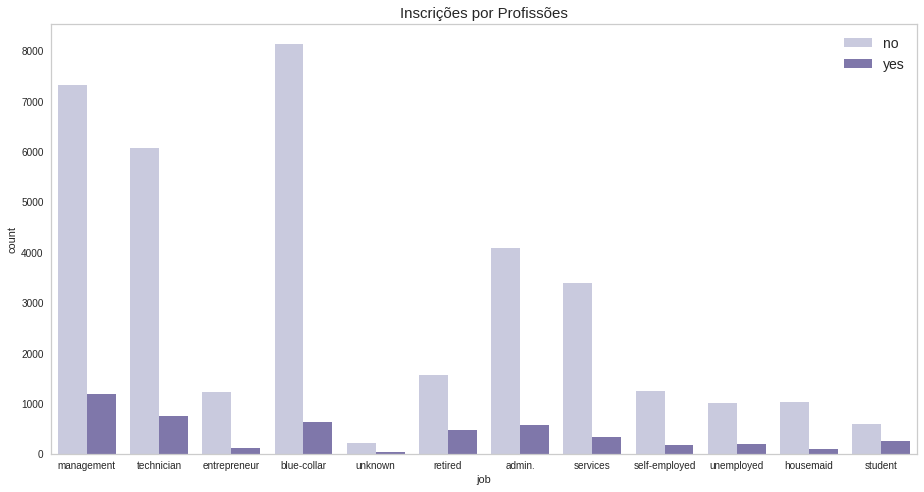

In [10]:
plt.figure(figsize=(13,7))
plt.title('Inscrições por Profissões', fontsize=15)
sns.countplot(marketing['job'], hue='y', data=marketing, palette='Purples')
plt.grid(False)
plt.legend(fontsize=14)
plt.tight_layout()

A profissão dos clientes, não se mostrou uma feature pertinente para a tomada de decisão dos clientes, em adquirir o produto adicional.  

In [33]:
management = len((marketing[(marketing['y']=='yes') & (marketing['job']=='management')]))
technician = len((marketing[(marketing['y']=='yes') & (marketing['job']=='technician')]))
entrepreneur = len((marketing[(marketing['y']=='yes') & (marketing['job']=='entrepreneur')]))
blue_collar = len((marketing[(marketing['y']=='yes') & (marketing['job']=='blue-collar')]))
unknown = len((marketing[(marketing['y']=='yes') & (marketing['job']=='unknown')]))
retired = len((marketing[(marketing['y']=='yes') & (marketing['job']=='retired')]))
admin = len((marketing[(marketing['y']=='yes') & (marketing['job']=='admin')]))
services = len((marketing[(marketing['y']=='yes') & (marketing['job']=='services')]))
self_employed = len((marketing[(marketing['y']=='yes') & (marketing['job']=='self-employed')]))
unemployed = len((marketing[(marketing['y']=='yes') & (marketing['job']=='unemployed')]))
maid = len((marketing[(marketing['y']=='yes') & (marketing['job']=='housemaid')]))
student = len((marketing[(marketing['y']=='yes') & (marketing['job']=='student')]))


print('Inscritos')
print('\n')
print('Gerentes: {}'.format(management))
print('Técnicos: {}'.format(technician))
print('Trabalhadores manual: {}'.format(blue_collar))
print('Aposentados: {}'.format(retired))
print('Serviços: {}'.format(services))
print('Estudantes: {}'.format(student))
print('Desimpregados: {}'.format(unemployed))
print('Autonomos: {}'.format(self_employed))
print('Empreendedores: {}'.format(entrepreneur))
print('Caseiros: {}'.format(maid))
print('desconhecidos: {}'.format(unknown))
print('Administradores: {}'.format(admin))

Inscritos


Gerentes: 1178
Técnicos: 753
Trabalhadores manual: 637
Aposentados: 467
Serviços: 331
Estudantes: 247
Desimpregados: 185
Autonomos: 172
Empreendedores: 113
Caseiros: 95
desconhecidos: 31
Administradores: 0


<br>
<hr>
<br>


##### Qual o grau acadêmico com maior número de adesão ao produto ? 

<br>

No handles with labels found to put in legend.


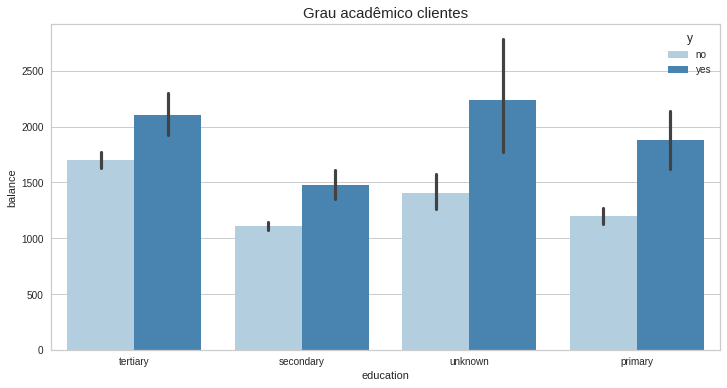

In [74]:
plt.figure(figsize=(12,6))
plt.title('Grau acadêmico clientes', fontsize=15)
plt.legend(fontsize=14)
sns.barplot(x='education', y='balance', data=marketing, palette='Blues', hue='y')
print('\n')

A adesão pelo produto comparada com o grau acadêmico, mostrou que  <b>tertiary </b> juntamente com <b> unknown </b> são os graus acadêmicos dos clientes que mais aderiram ao produto, clientes com um saldo maior acabam adotando a campanha, a tendência é de que maior o saldo do cliente, maior as chances de adiquirir o produto. 

<br>
<hr>
<br>

##### A duração do contato, interfere na adesão do cliente ?


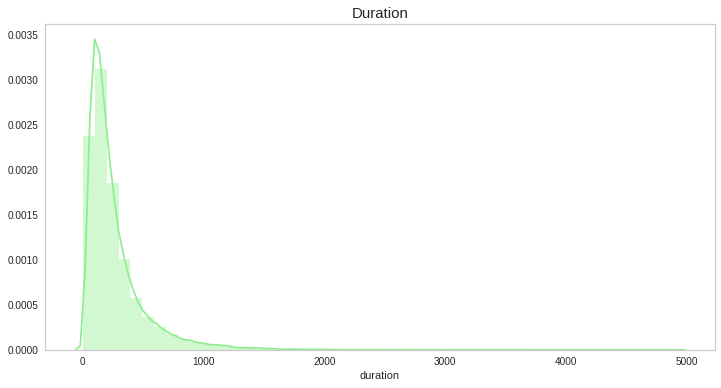

In [73]:
# distribuição (duration)

plt.figure(figsize=(12,6))
plt.title('Duration', fontsize=15)
plt.grid(False)
sns.distplot(marketing['duration'], color='lightgreen', kde=True)
print('\n')

A duração possui uma Assimetria positiva, com uma cauda mais fina e longa a direita da distribuição, a maior parte dos valores estão entre 0 a 1000. (unidade de medida não informada provavelmente sejam minutos acumulados.) 

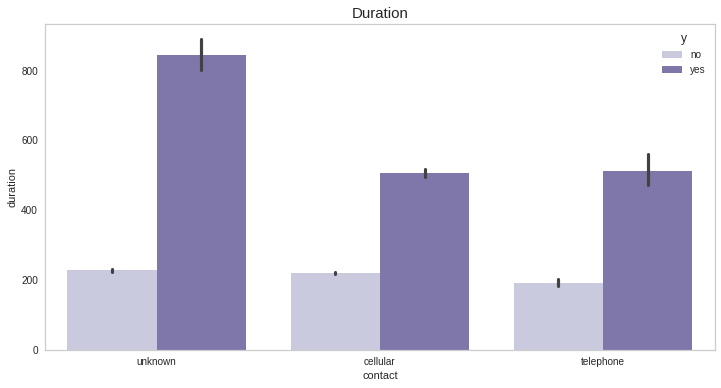

In [72]:
# Tempo de Retenção de clientes

plt.figure(figsize=(12,6))
plt.title('Duration', fontsize=15)
plt.grid(False)
sns.barplot(x='contact', y='duration', hue='y', data=marketing, palette='Purples')
print('\n')

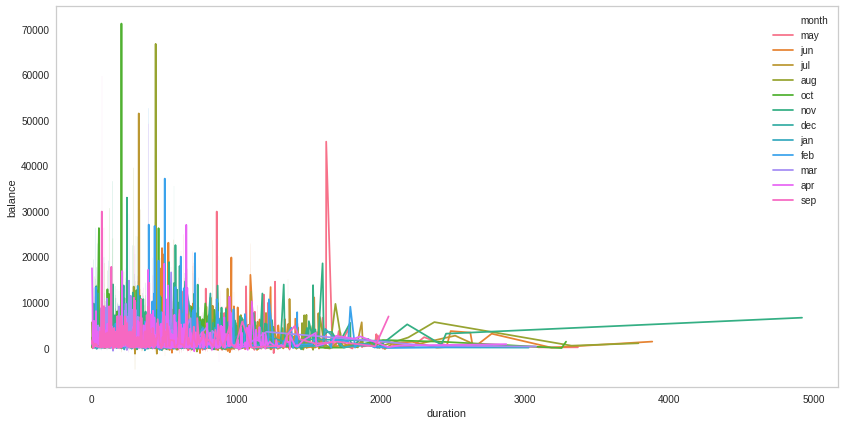

In [82]:
plt.figure(figsize=(14,7))
plt.grid(False)
sns.lineplot(x='duration', y='balance', hue='month', data=marketing)